# Implementing Statistics with Functions - Lab

## Introduction 
In this lab you'll dive deep into calculating the measures of central tendency and dispersion introduced in previous lessons. You will code the formulas for these functions in python which will require you to use the programming skills that you have gained in the other sections of the module. Let's get started!

## Objectives

You will be able to:
* Create functions to model measures of central tendency and dispersion
* Perform basic statistical analysis of given data using measures of central tendency and dispersion. 

## Dataset

For this lab, we'll use the [NHIS dataset](http://people.ucsc.edu/~cdobkin/NHIS%202007%20data.csv), which contains weights, heights, and some other attributes for a number of surveyed individuals. The context of this survey is outside the scope this lab, so we'll just go ahead and load the heights column as a list for us to run some simple statistical experiments. We'll use the pandas library to import the data into our python environment. This process will be covered in detail in the next section. For now, we'll do this part for you to give you a head start.  

Run the cell below to import the data. 

In [1]:
import pandas as pd
df = pd.read_csv('nhis.csv')
height = list(df['height'])
df.head()

,HHX,FMX,FPX,SEX,BMI,SLEEP,educ,height,weight
0,16,1,2,1,33.36,8,16,74,260
1,20,1,1,1,26.54,7,14,70,185
2,69,1,2,2,32.13,7,9,61,170
3,87,1,1,1,26.62,8,14,68,175
4,88,1,1,2,27.13,8,13,66,168


We are only interested in the height column, so we saved as a list and stored in in the variable `height` in the cell above. 

In the cell below:

* Print out the number of items in `height`
* Slice and print out the first 10 items from `height`

In [2]:
 print(len(height))
print(height[0:10])
    
# Expected Output: 4785
 # Expected Output: [74, 70, 61, 68, 66, 98, 99, 70, 65, 64]

4785
[74, 70, 61, 68, 66, 98, 99, 70, 65, 64]


So around 4700 records of height, that's great. Next, we'll try plotting some basic **_Histograms_** for these records. 

## Plotting Histograms

We'll begin by importing the `pyplot` module from the library `matplotlib` and setting an alias of `plt` for it (so that we only have to type `plt.` instead of `matplotlib.pyplot.` each time we want to use it).  Note that `plt` is considered the **_Standard Alias_** for matplotlib.

Run the cell below to import matplotlib and use it to create a histogram of our `height` data, with 8 different bins. 

In [3]:
# Import matplotlib and plot histogram for height data
import matplotlib.pyplot as plt
%matplotlib inline  
# ^^This is a 'magic command' built into jupyter notebooks. We use it so that the visualization displays 
# in the notebook directly, instead of in a separate window.  

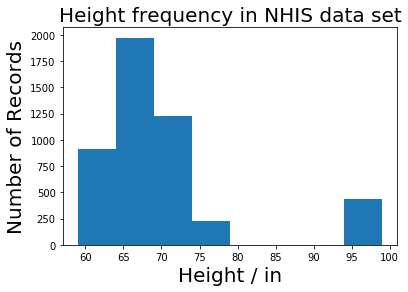

In [9]:
plt.hist(height, bins=8)
plt.title('Height frequency in NHIS data set', fontsize = 20)
plt.xlabel('Height / in', fontsize = 20)
plt.ylabel('Number of Records', fontsize = 20)
plt.show()

Next, we'll use matplotlib to create a histogram by passing in our data, as well as the parameter `bins=8`.

(array([ 917., 1972., 1230.,  228.,    0.,    0.,    0.,  438.]),
 array([59., 64., 69., 74., 79., 84., 89., 94., 99.]),
 <a list of 8 Patch objects>)

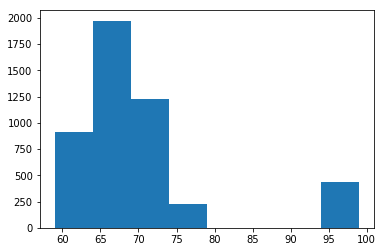

In [10]:
# Expected output below
plt.hist(height, bins=8)

Do you spot anything unusual above? Some outliers, maybe?

## Measures of Central Tendency: Calculating the Mean

We're just beginning to dig into the data stored in `height`. We'll begin by writing a function to calculate the mean of the data.  Recall the formula for calculating mean:

$$ \Large \bar{x} = \frac{1}{n} \sum_{i=1}^{n}x_i $$

Using the python skills you have learned so far, create a function `get_mean()` to perform the following tasks: 
* Input a list of numbers (like the height list we have above)
* Calculate the sum of numbers and length of the list 
* Calculate mean from above, round off to 2 decimals and return it.

In [11]:
def get_mean(data):

    mean = sum(data)/len(data)
    
    return round(mean,2)

test1 = [5, 4, 1, 3, 2]
test2 = [4, 2, 3, 1]

print(get_mean(test1)) # 3
print(get_mean(test2)) # 2.5

3.0
2.5


Now we'll test the function by passing in the height list.

In [12]:
# After creating the function, pass the height list to the function 
mean = get_mean(height)

# Uncomment following command after coding the function
print("Sample Mean:", mean)

# Sample Mean: 69.58

Sample Mean: 69.58


So we have our mean length, 69.58, and this confirms our observations from the histogram. But we also have some outliers in our data above and we know outliers affect the mean calculation by pulling the mean value in their direction. So let's remove these outliers and create a new list to see if our mean shifts or stays. We'll use a threshold of 80 inches, i.e. filter out any values greater than 80. 
 
Perform following tasks:

* Create a function `filter_list()` that inputs a list 
* Perform a for loop to iteratively check and append values to a new list if < 80. 
* Return the new list 

In [13]:
def filter_list(listA):
    
    listB = []
    
    # Perform filtering here  in a for loop
    for value in listA:
        if value < 80:
            listB.append(value)
    return listB

test = [60, 70, 80, 90]
filter_list(test) # [60, 70]

[60, 70]

Great, now we can filter our height list and plot a new histogram for the new list to see if things change considerably.  

In [14]:
# Filter the height list using the above function
height_under_80 = filter_list(height)

Now that we have filtered the outliers out of our data, let's recreate our histogram using our filtered data. 

In the cell below:

* Use `filter_list` to filter `height` and store the result in the variable `filtered_height`
* Create a histogram of `filtered_height` with 8 bins, the same as we did above. 

**_NOTE_**: You do not need to reimport matplotlib--once it's been imported once, it's stored in memory and can be accessed whenever we like in other cells. 

[]

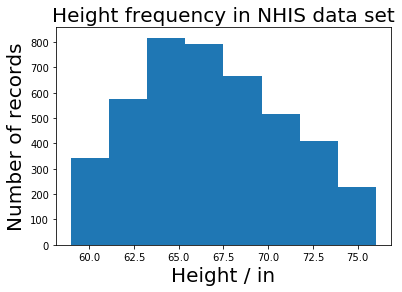

In [17]:
filtered_height = height_under_80
plt.hist(filtered_height, bins=8)
plt.title('Height frequency in NHIS data set', fontsize=20)
plt.xlabel('Height / in', fontsize=20)
plt.ylabel('Number of records', fontsize=20)
plt.plot()


Since we've filtered our data to remove outliers, we should also recalculate the mean.  Do this now in the cell below. 

In [18]:
# Get the mean of the new list using our get_mean() function
get_mean(filtered_height)

# 66.85

66.85

Does the mean height of our filtered data match up with what we see in our histogram of our filtered data?

Note that in some analytical situations we may not be able to exclude the outliers in such a naive manner. So, let's go ahead and  calculate other measures of central tendency as well. We'll start by calculating the median value for our original (unfiltered) height data. 

## Calculating the Median 

The median is the value directly in the middle of the dataset. In statistical terms, this is the **_Median Quartile_**. If the dataset was sorted from lowest value to highest value, the median is the value that would be larger than the first 50% of the data, and smaller than the second 50%.

If the dataset has an odd number of values, then the median is the middle number.
If the dataset has an even number of values, then we take the mean of the middle two numbers.

In the cell below, write a function that takes in an array of numbers and returns the median value for that dataset. Make sure you first check for even / odd and perform the computation accordingly. The best approach to calculate the median is as follows:

1. Sort the data. 
2. Check if the data is even or odd. 
3. Calculate the median of the sorted data, now that you know if the data is even or odd. 

(Hint: Recall that you can use modulo operator `%` in python to check if a value is even or odd--odd numbers `% 2` will equal `1`, while even numbers `% 2` will equal `0`!)

In [21]:
def get_median(data):

    data_sorted = sorted(data)
    
    # Check for even/odd and perform calculations accordingly - use if-else 
    if len(data_sorted) %2 == 0:
        return (data_sorted[int(len(data_sorted)/2)] + data_sorted[(int(len(data_sorted)/2)-1)])/2
    else:
        return data_sorted[int(len(data_sorted)/2 - .5)]
   

test1 = [5, 4, 1, 3, 2]
test2 = [4, 2, 3, 1]

print(get_median(test1)) # 3
print(get_median(test2)) # 2.5

3
2.5


Great, now we can pass in our height list to this function to check the median. 

In [22]:
get_median(height)
# 67

67

So we have 67, which is much closer to the filtered list mean (66.85) than the mean we calculated with actual list (69.58). So median in this case seems to be a much better indicator of the central tendency found in the dataset. This makes sense because we've already learned that medians are less sensitive to outliers than mean values are! 

Next, we'll calculate the Mode. This could give us better insight into the typical values in the dataset based on how frequent a value is.  

## Calculating the Mode

The mode is the value that shows up the most in a dataset. A dataset can have 0 or more modes. If no value shows up more than once, the dataset is considered to have no mode value. If two numbers show up the same number of times, that dataset is considered bimodal. Datasets where multiple values all show up the same number of times are considered multimodal.

In the cell below, write a function that takes in a list of numbers and returns another list containing the mode value(s). In the case of only one mode, the list would have a single element. 

**_Hint_**: Building a **_Frequency Distribution_** table using dictionaries is probably the easiest way to approach this problem. Use each unique element from the height list as a key, and the frequency of this element as the value and build a dictionary. You can then simply identify the keys (heights) with maximum values. 

In [39]:
def get_mode(data):

    # Create and populate frequency distribution
    frequency_dict = {}
    
    # For all elements in the list:
    # If an element is not in the dictionary, add it with value 1
    # If an element is already in the dictionary, +1 the value
    for element in data:
        if frequency_dict.get(element) == None:
            frequency_dict[element] = 1
        else:
            count = frequency_dict.get(element)
            count += 1
            frequency_dict[element] = count
    
    
    # Create a list for mode values
    modes = []
    
    #from the dictionary, add element(s) to the modes list with max frequency
    highest_freq = max(frequency_dict.values())
    for key, value in frequency_dict.items():
        if value == highest_freq:
            modes.append(key)

    # Return the mode list 
    return modes

test1 = [1, 2, 3, 5, 5, 4]
test2 = [1, 1, 1, 2, 3, 4, 5, 5, 5]

print(get_mode(test1)) # [5]
print(get_mode(test2)) # [1, 5]

[5]
[1, 5]


That's done. Now you can see the calculated mode and compare it with our mean and median values. 

In [40]:
get_mode(height)

[64]

So the mode value is much lower than our mean and median calculated earlier. What do you make of this? The answer to that could be subjective and depends on the problem. i.e. if your problem is to identify sizes for garments that would sell the most, you cannot disregard mode. However, if you want to get an idea about the general or typical height of individuals, you can probably still do that with the median and the average. 

To get an even clearer picture, we know we need to see how much the values deviate from the central values we have identified. We have seen variance and standard deviation before as measures of such dispersion. Let's have a go at these to strengthen our understanding of this data. 


## Calculating the Variance

The formula for variance is: 

$$ \Large s^2 = \frac{1}{n - 1} \sum_{i=1}^{n}(x_i - \bar{x})^2 $$

Note that this formula here is for the **sample** variance. The formula is slightly different than the formula for calculating population variance. Read more about the difference [here](https://www.macroption.com/population-sample-variance-standard-deviation/). In the cell below, write a function that takes an array of numbers as input and returns the variance of the sample as output.

In [44]:
def get_variance(sample):

    # First, calculate the sample mean using get_mean()
    sample_mean = get_mean(sample)
    
    # Now, subtract the sample mean from each point and square the result. 
    squares_of_errors = 0
    for value in sample:
        squares_of_errors += (value-sample_mean)**2
    # Divide the total by the number of items in the sample to calculate variance 
    variance = squares_of_errors/(1-len(sample))
    
    return round(abs(variance), 2)

test1 = [1, 2, 3, 5, 5, 4]
test2 = [1, 1, 1, 2, 3, 4, 5, 5, 5]
print(get_variance(test1)) # 2.67
print(get_mean(test1)) # 3.33
print(get_variance(test2)) # 3.25

2.67
3.33
3.25


Now we can test the variance of our height list with our new `get_variance()` function. 

In [45]:
get_variance(height)
# 87.74

87.74

So this value, as we learned earlier, tells us a bit about the deviation but not in the units of underlying data. This is because it squares the values of deviations. Standard deviation, however, can deal with this issue as it takes the square roots of differences. So that would probably be a bit more revealing. 

## Calculating the Standard Deviation

In the cell below, write a function that takes an array of numbers as input and returns the standard deviation of that sample as output.

Recall that the formula for Standard Deviation is:

$$ \Large s = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n}(x_i - \bar{x})^2} $$

you would need `sqrt` method from `math` library to calculate the square root.

**Note:** *Alternatively, another approach to finding the square root of a number would be to raise that number to the power of `0.5`. For example, if we wanted to find the square root of `100`, we could raise `100` to the power of `0.5`, which would give us the number `10.0`. However, **either** approach will work.*

```python
100**0.5
# 10.0

from math import sqrt
sqrt(100)
# 10.0
```

In [48]:
from math import sqrt

def get_stddev(numlist):

    mean = get_mean(numlist)
    
    squares_of_errors = 0
    for value in numlist:
        squares_of_errors += (value-mean)**2
        
    stddev = sqrt(1/(len(numlist)-1)*squares_of_errors)
    
    return stddev

test = [120,112,131,211,312,90]

print (get_stddev(test))
# 84.03

84.03253346174921


So now we can finally calculate the standard deviation for our height list and inspect the results. 

In [49]:
get_stddev(height)
# 9.37

9.367217550164352

So 9.37 inches is the amount of deviation present in our dataset. As we are still including outlier values, this might still slightly be affected but these results are now much more reliable. 

We shall finally build a boxplot for height data and see if it agrees with our understanding for this data that we have developed up to this point. Use the matplotlib's boxplot method with height data and comment on the output.

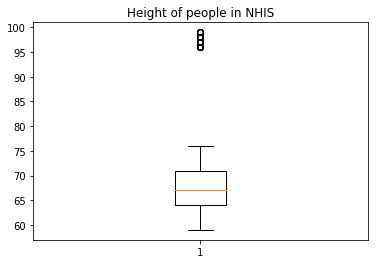

In [51]:
# boxplot here
plt.boxplot(height)
plt.title('Height of people in NHIS')
plt.show()

## Summary 

In this lab, we performed a basic, yet detailed statistical analysis around measuring the tendencies of center and spread in a given dataset. We looked at building a number of functions to calculate different measures and also used some statistical visualizations to strengthen our intuitions around the dataset. We shall see how we can simplify this process as we study numpy and pandas libraries to ease out the programming load while calculating basic statistics. 